In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (17,8)

In [6]:
df=pd.read_csv('df_prepared.csv')

In [7]:
df.shape

(17710, 5)

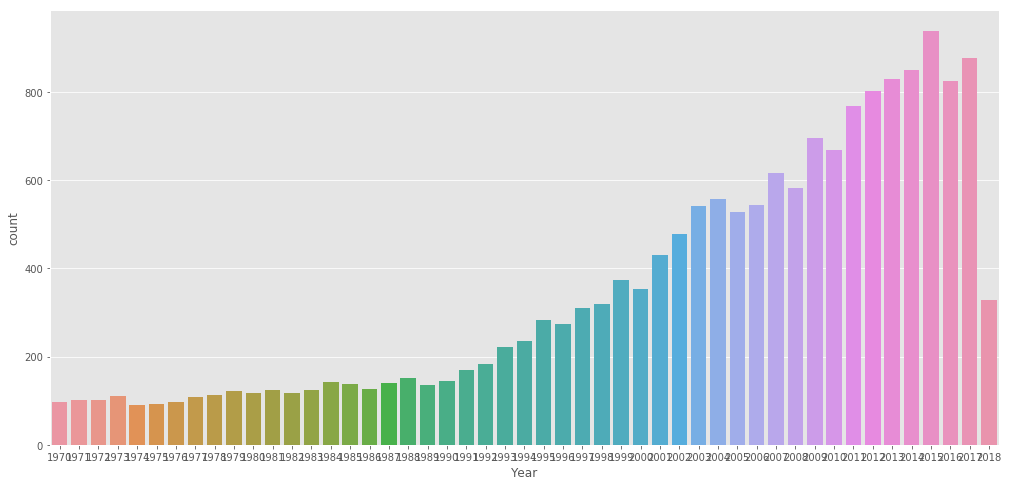

In [8]:
sns.countplot(df.Year[df.Year>=1970].astype(int))

In [204]:
groups=7

In [205]:
years=df.Year.astype(int)
cumsum=np.cumsum(years.value_counts().sort_index())
cumsum=(cumsum/ (df.shape[0] / groups)).astype(int)
df['Year']=df.Year.astype(int)
df['Epoch']=cumsum[df.Year].values
df.loc[df['Epoch']==groups,'Epoch']=groups-1

In [206]:
df.head()

,Artist,Song_name,Album,Year,Text,Epoch
0,Kingdom Come,Pushin' Hard,Kingdom Come,1988,I wish we'd end this suffering And all this ...,1
1,Kingdom Come,Stay,Hands Of Time,1991,"Now, I have found that the girl I love can't...",1
2,Kingdom Come,What Love Can Be,Kingdom Come,1988,Come to me now I want to be your best friend...,1
3,King Gizzard & The Lizard Wizard,Am I In Heaven?,I'm In Your Mind Fuzz,2014,I've got ideas in my brain About the end of ...,5
4,King Gizzard & The Lizard Wizard,Deserted Dunes Welcome Weary Feet,Polygondwanaland,2017,Deserted dunes welcome weary feet Feel eupho...,6


In [207]:
max_years=df.groupby(['Epoch'])['Year'].max()
min_years=df.groupby(['Epoch'])['Year'].min()
periods = zip(min_years,max_years)
print (max_years-min_years).values
print periods

[42 11  5  3  3  2  3]
[(1943, 1985), (1986, 1997), (1998, 2003), (2004, 2007), (2008, 2011), (2012, 2014), (2015, 2018)]


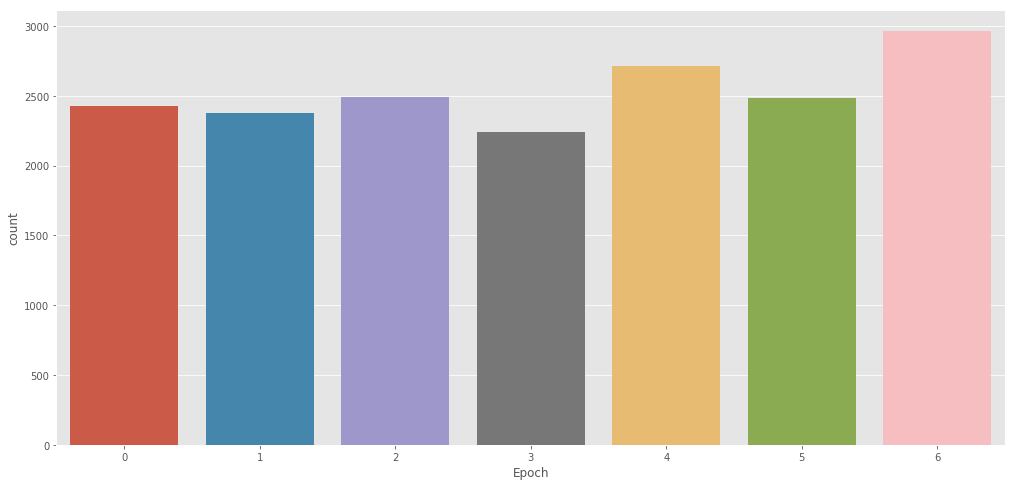

In [208]:
sns.countplot(df.Epoch)

In [209]:
df.groupby(['Epoch'])['Artist'].apply(np.unique).apply(np.shape)

Epoch
0     (629,)
1    (1062,)
2    (1393,)
3    (1473,)
4    (1787,)
5    (1730,)
6    (2045,)
Name: Artist, dtype: object

In [210]:
uniq_groups=df.groupby(['Epoch'])['Artist'].apply(np.unique).apply(np.shape)

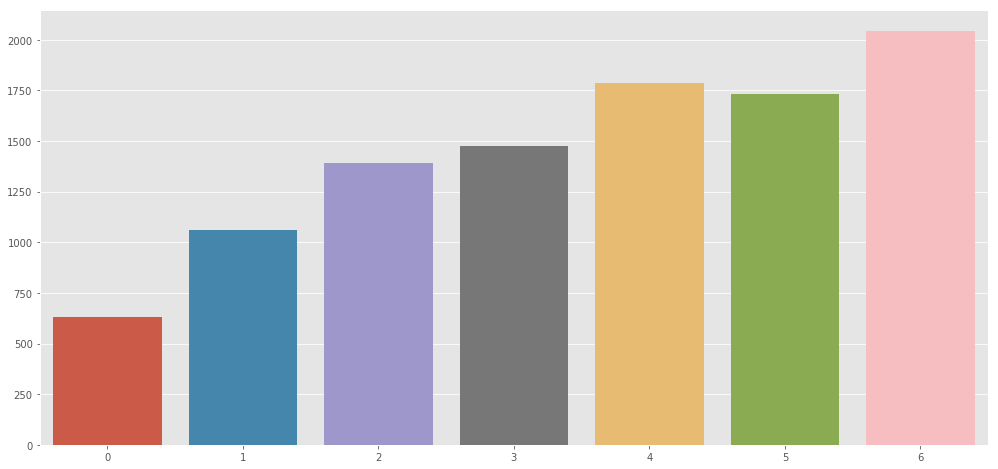

In [211]:
sns.barplot(y=[x[0] for x in uniq_groups],x=range(groups))

# Подсчёт самых частых слов в эпохах

In [201]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
from nltk.corpus import stopwords
from collections import Counter
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [207]:
def func(df_):
    text_list=[text_sample.lower() for text_sample in df_.values]
    print len(text_list)
    counter_list=[]
    for text in text_list:
        counter_list.append(Counter([morph.parse(word)[0].normal_form for word in tokenizer.tokenize(text) if word not in stopwords.words('english')]))
    summed=Counter()
    for c in counter_list:
        summed+=c
    return summed.most_common(20)

In [203]:
def func_(df_):
    text_list=[text_sample.lower() for text_sample in df_.values]
    print len(text_list)
    counter_list=[]
    for text in text_list:
        counter_list.append(Counter([word for word in tokenizer.tokenize(text) if word.encode('utf-8') not in stopwords.words('english')]))
    summed=Counter()
    for c in counter_list:
        summed+=c
    return summed.most_common(10)

In [208]:
grouped=df.groupby(['Epoch'])['Text'].apply(func) #с лемматизацией

2430


/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

In [93]:
grouped_=df.groupby(['Epoch'])['Text'].apply(func_) #без

2430


/home/nikita/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


2376
2494
2245
2715
2482
2968


In [38]:
grouped

Epoch
0    [(know, 25), (say, 17), (day, 15), (come, 15),...
1    [(time, 23), (take, 19), (pry, 14), (open, 13)...
2    [(city, 19), (got, 15), (yeah, 14), (say, 11),...
3    [(dance, 10), (talk, 10), (rather, 10), (getti...
4    [(hot, 23), (stay, 16), (cold, 14), (rise, 12)...
5    [(played, 19), (fool, 17), (love, 14), (got, 1...
6    [(give, 34), (love, 27), (gotta, 17), (let, 16...
Name: Text, dtype: object

In [94]:
grouped_

Epoch
0    [(n, 4614), (love, 4372), (know, 2755), (oh, 2...
1    [(n, 4883), (r, 4851), (love, 3266), (know, 29...
2    [(r, 8138), (n, 5623), (know, 3594), (like, 34...
3    [(r, 10215), (n, 5559), (know, 3556), (like, 3...
4    [(n, 7187), (r, 4741), (like, 4580), (know, 42...
5    [(n, 6831), (like, 5062), (know, 4178), (love,...
6    [(n, 9356), (like, 6327), (know, 5452), (got, ...
Name: Text, dtype: object

In [63]:
for i,x in enumerate(grouped):
    print periods[i]
    print x
    print

(1943, 1985)
[('know', 25), ('say', 17), ('day', 15), ('come', 15), ('happy', 13), ('friends', 13), ('gonna', 12), ('go', 11), ('back', 11), ('love', 11)]

(1986, 1997)
[('time', 23), ('take', 19), ('pry', 14), ('open', 13), ('gonna', 11), ('words', 11), ('want', 10), ('lonely', 7), ('like', 7), ('talking', 7)]

(1998, 2003)
[('city', 19), ('got', 15), ('yeah', 14), ('say', 11), ('see', 10), ('girl', 9), ('angels', 9), ('wings', 8), ('dead', 8), ('time', 8)]

(2004, 2007)
[('dance', 10), ('talk', 10), ('rather', 10), ('getting', 8), ('swing', 8), ('deify', 6), ('made', 6), ('new', 5), ('come', 5), ('want', 5)]

(2008, 2011)
[('hot', 23), ('stay', 16), ('cold', 14), ('rise', 12), ('oh', 12), ('fallen', 10), ('awake', 10), ('bye', 8), ('yeah', 8), ('baby', 8)]

(2012, 2014)
[('played', 19), ('fool', 17), ('love', 14), ('got', 13), ('heaven', 12), ('infected', 12), ('manifested', 12), ('come', 11), ('right', 10), ('restless', 10)]

(2015, 2018)
[('give', 34), ('love', 27), ('gotta', 17), 

In [95]:
for i,x in enumerate(grouped_):
    print periods[i]
    print x
    print

(1943, 1985)
[('n', 4614), ('love', 4372), ('know', 2755), ('oh', 2251), ('got', 2022), ('baby', 1998), ('ni', 1909), ('time', 1810), ('like', 1742), ('one', 1590)]

(1986, 1997)
[('n', 4883), ('r', 4851), ('love', 3266), ('know', 2939), ('like', 2609), ('got', 1964), ('ni', 1815), ('one', 1787), ('get', 1777), ('time', 1764)]

(1998, 2003)
[('r', 8138), ('n', 5623), ('know', 3594), ('like', 3425), ('love', 2869), ('get', 2594), ('got', 2471), ('ni', 2341), ('one', 2118), ('see', 2015)]

(2004, 2007)
[('r', 10215), ('n', 5559), ('know', 3556), ('like', 3028), ('get', 2586), ('love', 2565), ('got', 2487), ('ni', 2100), ('go', 1792), ('see', 1760)]

(2008, 2011)
[('n', 7187), ('r', 4741), ('like', 4580), ('know', 4289), ('love', 4057), ('get', 3204), ('ni', 3175), ('got', 3047), ('oh', 2626), ('go', 2427)]

(2012, 2014)
[('n', 6831), ('like', 5062), ('know', 4178), ('love', 3336), ('got', 3333), ('oh', 3035), ('ni', 2966), ('get', 2867), ('go', 2560), ('let', 2210)]

(2015, 2018)
[('n', 

# TF-IDF

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

text_clf = Pipeline([
                    ('countvect', CountVectorizer(stop_words=stopwords.words('english'))),
                    ('tfidf', TfidfTransformer() ),
                    ('clf', SGDClassifier()),
                   ])

In [213]:
class_size=200
test_ind=np.empty(0,dtype=int)
X_test=np.empty(0)
for i in range(groups):
    rand_ind=np.random.choice(np.array(df.loc[df.Epoch==i].index,dtype=int),size=class_size,replace=False)
    test_ind=np.append(test_ind,rand_ind)
    X_test=np.append(X_test,df.loc[rand_ind].Text)
y_test=np.array([[i]*class_size for i in range(groups)]).ravel()

In [214]:
X_train=df.drop(labels=test_ind,axis=0).Text
y_train=df.drop(labels=test_ind,axis=0).Epoch

In [215]:
X_train.shape

(16310,)

In [216]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('countvect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=[u'...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [217]:
accuracy_score(y_test,text_clf.predict(X_test))

0.2792857142857143

In [ ]:
stopwords.words('english')